In [39]:
import os
import cv2
import shutil
import numpy as np
from tqdm import tqdm
from glob import glob
import nibabel as nib
import matplotlib.pyplot as plt
import torch

In [11]:
base_dir = '../data/train'
modality_types = ['flair', 't1ce', 't1', 't2', 'seg']

In [12]:
print ('number of patients:', len (os.listdir (base_dir)) )

number of patients: 5


In [26]:
sample_path = os.path.join (base_dir, sorted (os.listdir (base_dir))[0])
sample_path

'../data/train/BraTS20_Training_001'

In [27]:
fnames = glob (f'{sample_path}/*.nii.gz')
fnames

['../data/train/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii.gz',
 '../data/train/BraTS20_Training_001/BraTS20_Training_001_t1.nii.gz',
 '../data/train/BraTS20_Training_001/BraTS20_Training_001_flair.nii.gz',
 '../data/train/BraTS20_Training_001/BraTS20_Training_001_t2.nii.gz',
 '../data/train/BraTS20_Training_001/BraTS20_Training_001_seg.nii.gz']

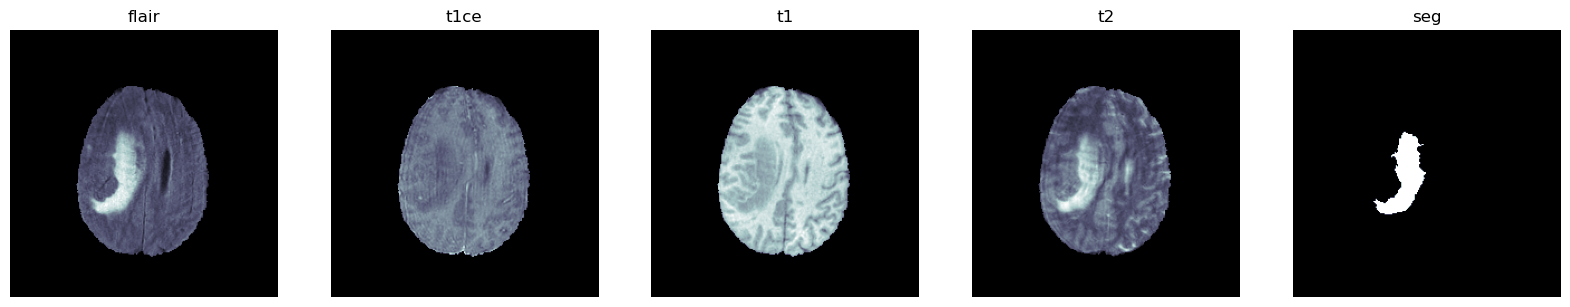

In [51]:
one_sample = []

plt.figure (figsize = (20, 5))
for i, modality_type in enumerate (modality_types):
    plt.subplot (1, 5, i + 1)
    img_path = glob (f'{sample_path}/*_{modality_type}.nii.gz')[0]
    img = nib.load (img_path).get_fdata().T
    plt.imshow (img [100], cmap = 'bone')
    plt.title (modality_type)
    plt.axis ('off')

**Segmented image description**

In [34]:
img = nib.load (fnames [3])
img = np.asanyarray (img.dataobj).T
print (img.dtype)
print (img.shape)

int16
(155, 240, 240)


In [49]:
img = nib.load (fnames [2])

In [45]:
t = torch.tensor(img.get_fdata().T)

In [46]:
t.shape

torch.Size([155, 240, 240])

In [39]:
# maximum number of segmented image
max_nums = []
for i in tqdm (range (155)):
    max_num = img [i].max ()
    max_nums.append (max_num)

print (max (max_nums))

100%|██████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 102123.33it/s]

376


In [40]:
folders = (sorted (os.listdir (base_dir)))

In [42]:
os.mkdir ('BraTs')

In [53]:
i = 0
for folder in tqdm (folders):
    # go to each patient data
    folder_dir = os.path.join (base_dir, folder)
    imgs = []
    for modality_type in modality_types:
        # read each data and save it to list
        img_path = glob (f'{folder_dir}/*_{modality_type}.nii.gz')[0]
        img = nib.load (img_path)
        img = np.asanyarray (img.dataobj).T
        img = ((img - img.min ())/(img.max () - img.min ()) * 255).astype(np.uint8)
        imgs.append (img)
    print(imgs[0].shape)
    continue
    for j in range (imgs [0].shape [0]):
        # just not empty images
       if sum ([imgs [num][j].sum () for num in range (5)]) != 0:
            i += 1
            # create directory
            if not os.path.exists ('BraTs/' + str (i)):
                os.mkdir ('BraTs/' + str (i))
    
            for idx, modality_name in enumerate (modality_types):
            
                cv2.imwrite (modality_name + '.jpg', imgs [idx][j])
                
                # save 5 type of each slice in separate folder
                src = modality_name + '.jpg'
                dst = os.path.join ('BraTs/' + str (i), src)
                shutil.move (src, dst)

  3%|██▋                                                                              | 1/30 [00:00<00:13,  2.23it/s]

(155, 240, 240)


  7%|█████▍                                                                           | 2/30 [00:00<00:12,  2.20it/s]

(155, 240, 240)


 10%|████████                                                                         | 3/30 [00:01<00:10,  2.48it/s]

(155, 240, 240)


 13%|██████████▊                                                                      | 4/30 [00:01<00:09,  2.65it/s]

(155, 240, 240)


 17%|█████████████▌                                                                   | 5/30 [00:01<00:09,  2.75it/s]

(155, 240, 240)


 20%|████████████████▏                                                                | 6/30 [00:02<00:09,  2.66it/s]

(155, 240, 240)


 23%|██████████████████▉                                                              | 7/30 [00:02<00:08,  2.65it/s]

(155, 240, 240)


 27%|█████████████████████▌                                                           | 8/30 [00:03<00:08,  2.73it/s]

(155, 240, 240)


 30%|████████████████████████▎                                                        | 9/30 [00:03<00:07,  2.78it/s]

(155, 240, 240)


 33%|██████████████████████████▋                                                     | 10/30 [00:03<00:07,  2.83it/s]

(155, 240, 240)


 37%|█████████████████████████████▎                                                  | 11/30 [00:04<00:06,  2.83it/s]

(155, 240, 240)


 40%|████████████████████████████████                                                | 12/30 [00:04<00:06,  2.86it/s]

(155, 240, 240)


 43%|██████████████████████████████████▋                                             | 13/30 [00:04<00:05,  2.88it/s]

(155, 240, 240)


 47%|█████████████████████████████████████▎                                          | 14/30 [00:05<00:05,  2.70it/s]

(155, 240, 240)


 50%|████████████████████████████████████████                                        | 15/30 [00:05<00:05,  2.77it/s]

(155, 240, 240)


 53%|██████████████████████████████████████████▋                                     | 16/30 [00:05<00:04,  2.81it/s]

(155, 240, 240)


 57%|█████████████████████████████████████████████▎                                  | 17/30 [00:06<00:04,  2.83it/s]

(155, 240, 240)


 60%|████████████████████████████████████████████████                                | 18/30 [00:06<00:04,  2.86it/s]

(155, 240, 240)


 63%|██████████████████████████████████████████████████▋                             | 19/30 [00:06<00:03,  2.89it/s]

(155, 240, 240)


 67%|█████████████████████████████████████████████████████▎                          | 20/30 [00:07<00:03,  2.91it/s]

(155, 240, 240)


 70%|████████████████████████████████████████████████████████                        | 21/30 [00:07<00:03,  2.92it/s]

(155, 240, 240)


 73%|██████████████████████████████████████████████████████████▋                     | 22/30 [00:07<00:02,  2.94it/s]

(155, 240, 240)


 77%|█████████████████████████████████████████████████████████████▎                  | 23/30 [00:08<00:02,  2.92it/s]

(155, 240, 240)


 80%|████████████████████████████████████████████████████████████████                | 24/30 [00:08<00:02,  2.87it/s]

(155, 240, 240)


 83%|██████████████████████████████████████████████████████████████████▋             | 25/30 [00:09<00:01,  2.77it/s]

(155, 240, 240)


 87%|█████████████████████████████████████████████████████████████████████▎          | 26/30 [00:09<00:01,  2.80it/s]

(155, 240, 240)


 90%|████████████████████████████████████████████████████████████████████████        | 27/30 [00:09<00:01,  2.85it/s]

(155, 240, 240)


 93%|██████████████████████████████████████████████████████████████████████████▋     | 28/30 [00:10<00:00,  2.88it/s]

(155, 240, 240)


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:10<00:00,  2.91it/s]

(155, 240, 240)


100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:10<00:00,  2.80it/s]

(155, 240, 240)
